In [1]:
%pwd

'C:\\Users\\Ravik\\OneDrive\\Documents\\GitHub\\Taxi_rides'

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F210-D153

 Directory of C:\Users\Ravik\OneDrive\Documents\GitHub\Taxi_rides

04/03/2021  04:31 PM    <DIR>          .
04/03/2021  04:31 PM    <DIR>          ..
04/03/2021  04:27 PM             1,928 .gitignore
04/03/2021  04:31 PM    <DIR>          .ipynb_checkpoints
04/03/2021  04:27 PM                40 README.md
04/03/2021  04:27 PM             9,865 Taxi Rides.ipynb
04/08/2017  03:39 AM         2,874,015 taxi.csv.bz2
               4 File(s)      2,885,848 bytes
               3 Dir(s)  10,155,880,448 bytes free


In [3]:
import bz2

In [4]:
fname="taxi.csv.bz2"

In [5]:
from os import path

In [6]:
path.getsize(fname)/(1<<20)

2.7408742904663086

In [7]:
with bz2.open(fname,'r') as fp:
    print(sum(1 for line in fp ))

100001


In [8]:
with bz2.open(fname,'rt') as fp:
    for lnum,line in enumerate(fp):
        print(line[:-1])
        if lnum>4:
            break

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 
2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,
2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038452148438,40.819576263427734,-73.907173156738281,40.811305999755859,2,1.41,12,0,0,0,0,,0,12,2,2,,
2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082458496094,40.807022094726563,-73.984642028808594,40.66314697265625,1,14.36,45,0.5,0.5,9.26,0,,0.3,55.56,1,1,,
2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200378417969,40.777961730957031,-73.926994323730469,40.772743225097656,2,1.05,6.5,0,0.5,0,0,,0.3,7.3,2,1,,
2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888061523

In [9]:
with bz2.open(fname,'rt') as fp:
    header=fp.readline()
    values=fp.readline()
print(header)
print(values)

VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type 

2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992240905761719,40.690120697021484,-73.999664306640625,40.684993743896484,2,.71,4.5,0,0.5,0,0,,0.3,5.3,2,1,,



In [10]:
len(header.split(','))

21

In [11]:
len(values.split(','))

23

In [12]:
import numpy as np

In [13]:
import pandas as pd

In [14]:
df=pd.read_csv(fname,usecols=np.arange(21))

In [15]:
df.head(5)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,4.5,0.0,0.5,0.00,0.0,NaN,0.3,5.30,2,1
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,12.0,0.0,0.0,0.00,0.0,NaN,0.0,12.00,2,2
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,45.0,0.5,0.5,9.26,0.0,NaN,0.3,55.56,1,1
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,6.5,0.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,5.5,1.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [16]:
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                  int64
dtype: object

In [17]:
df=pd.read_csv(fname,usecols=np.arange(21),parse_dates=['lpep_pickup_datetime','Lpep_dropoff_datetime'])

In [18]:
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

In [19]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,4.5,0.0,0.5,0.00,0.0,NaN,0.3,5.30,2,1
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,12.0,0.0,0.0,0.00,0.0,NaN,0.0,12.00,2,2
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,45.0,0.5,0.5,9.26,0.0,NaN,0.3,55.56,1,1
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,6.5,0.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,5.5,1.0,0.5,0.00,0.0,NaN,0.3,7.30,2,1


In [20]:
df['VendorID'].unique()

array([2, 1], dtype=int64)

In [21]:
df["vendor"]=df["VendorID"].apply({1:'creative',2:'vendifone'}.get)

In [22]:
df['vendor'].unique()

array(['vendifone', 'creative'], dtype=object)

In [23]:
df['vendor'].memory_usage()/(1<<20)

0.7630157470703125

In [24]:
df['vendor']=df['VendorID'].apply({1:"creative",2 :"Vendifone"}.get).astype('category')

In [25]:
df['vendor'].memory_usage()/(1<<20)

0.0955352783203125

In [26]:
df["vendor"].head().cat.codes

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [27]:
len(df[df['vendor']=='creative'])

22054

In [28]:
df["lpep_pickup_datetime"].head().dt.round('H')

0   2015-03-04 16:00:00
1   2015-03-22 18:00:00
2   2015-03-25 22:00:00
3   2015-03-16 14:00:00
4   2015-03-19 19:00:00
Name: lpep_pickup_datetime, dtype: datetime64[ns]

In [29]:
keys=df["lpep_pickup_datetime"].dt.round("H")

In [30]:
df.groupby(keys)

In [31]:
df.groupby(keys).count().head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,vendor
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-01 00:00:00,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,0,153,153,153,153,153
2015-03-01 01:00:00,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,0,266,266,266,266,266
2015-03-01 02:00:00,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,0,241,241,241,241,241
2015-03-01 03:00:00,180,180,180,180,180,180,180,180,180,180,...,180,180,180,180,0,180,180,180,180,180
2015-03-01 04:00:00,172,172,172,172,172,172,172,172,172,172,...,172,172,172,172,0,172,172,172,172,172


In [32]:
df.groupby(keys).count()['vendor'].dtypes

dtype('int64')

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[20,16]

In [34]:
plt.style.use('seaborn-whitegrid')

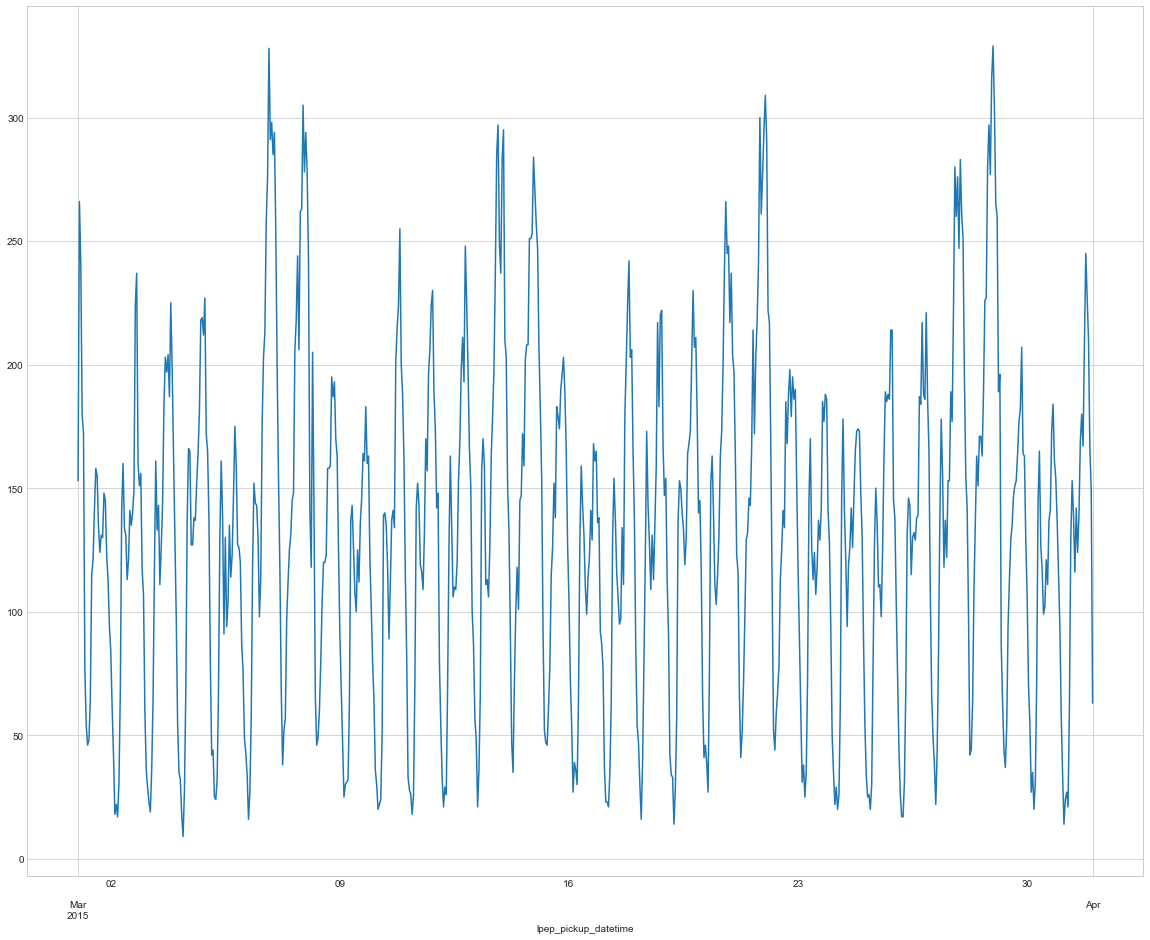

In [49]:
df.groupby(keys).count()['vendor'].plot()

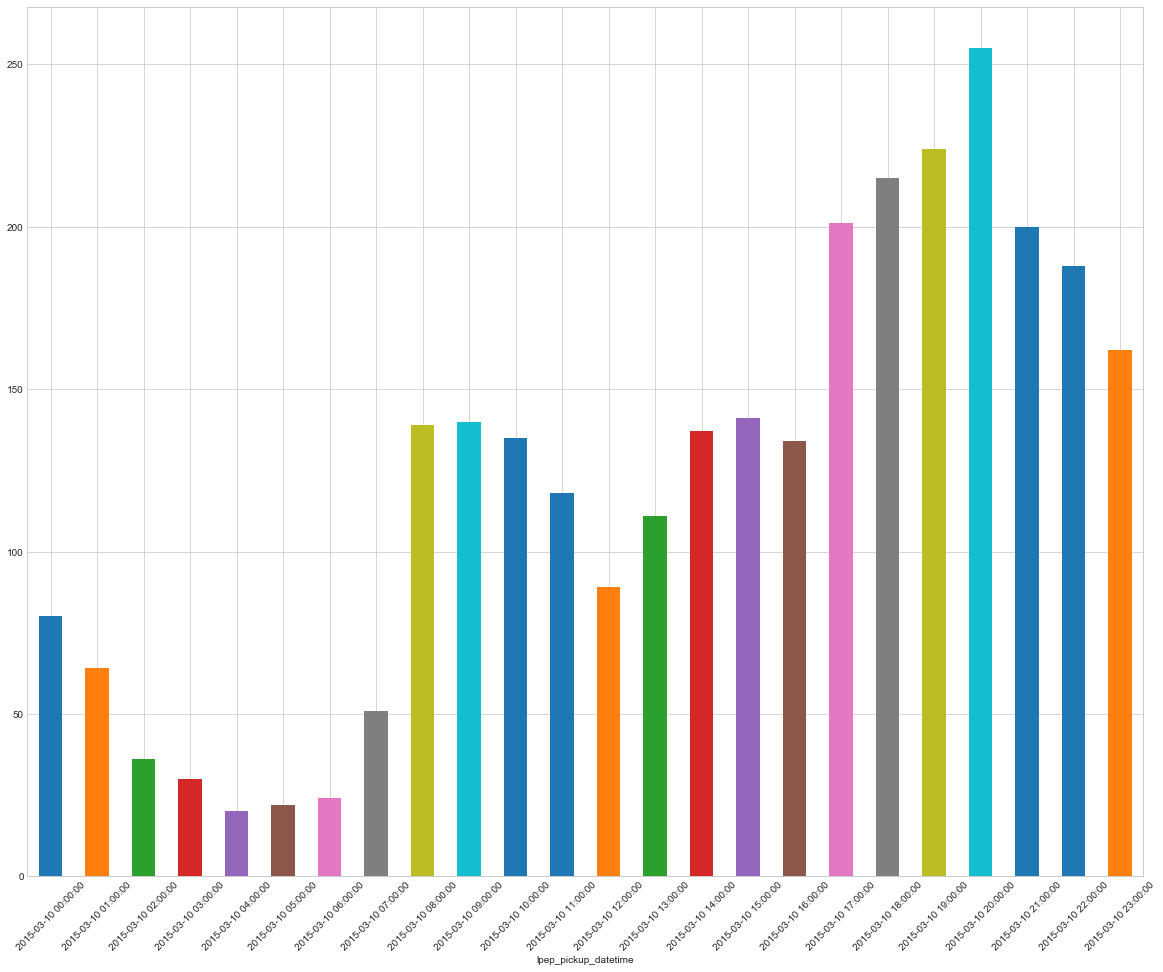

In [50]:
df.groupby(keys).count()['vendor'].loc['2015-03-10'].plot.bar(rot=45)

In [38]:
df['hour']=df["lpep_pickup_datetime"].dt.hour

In [39]:
df[['lpep_pickup_datetime','hour']].dtypes

lpep_pickup_datetime    datetime64[ns]
hour                             int64
dtype: object

In [40]:
df['day']=df["lpep_pickup_datetime"].dt.date

In [41]:
len(df[['vendor','hour','day']]['day'].unique())

31

In [42]:
df.groupby(['vendor','hour','day'],as_index=False).count().head()

,vendor,hour,day,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Vendifone,0,2015-03-01,217.0,217.0,217.0,217.0,217.0,217.0,217.0,...,217.0,217.0,217.0,217.0,217.0,0.0,217.0,217.0,217.0,217.0
1,Vendifone,0,2015-03-02,61.0,61.0,61.0,61.0,61.0,61.0,61.0,...,61.0,61.0,61.0,61.0,61.0,0.0,61.0,61.0,61.0,61.0
2,Vendifone,0,2015-03-03,56.0,56.0,56.0,56.0,56.0,56.0,56.0,...,56.0,56.0,56.0,56.0,56.0,0.0,56.0,56.0,56.0,56.0
3,Vendifone,0,2015-03-04,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,67.0,67.0,67.0,0.0,67.0,67.0,67.0,67.0
4,Vendifone,0,2015-03-05,87.0,87.0,87.0,87.0,87.0,87.0,87.0,...,87.0,87.0,87.0,87.0,87.0,0.0,87.0,87.0,87.0,87.0


# hourly based 

In [43]:
ddf=df.groupby(['vendor','hour','day'],as_index=False).count()

In [44]:
hdf=ddf.groupby(['vendor','hour'],as_index=False).median()

In [45]:
hdf

,vendor,hour,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,Vendifone,0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,...,84.0,84.0,84.0,84.0,84.0,0.0,84.0,84.0,84.0,84.0
1,Vendifone,1,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,...,48.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,48.0,48.0
2,Vendifone,2,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,33.0,33.0,33.0,33.0,33.0,0.0,33.0,33.0,33.0,33.0
3,Vendifone,3,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,27.0,27.0,27.0,27.0,27.0,0.0,27.0,27.0,27.0,27.0
4,Vendifone,4,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,22.0,22.0,22.0,22.0,22.0,0.0,22.0,22.0,22.0,22.0
5,Vendifone,5,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,...,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,20.0
6,Vendifone,6,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,...,35.0,35.0,35.0,35.0,35.0,0.0,35.0,35.0,35.0,35.0
7,Vendifone,7,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,...,73.0,73.0,73.0,73.0,73.0,0.0,73.0,73.0,73.0,73.0
8,Vendifone,8,113.0,113.0,113.0,113.0,113.0,113.0,113.0,113.0,...,113.0,113.0,113.0,113.0,113.0,0.0,113.0,113.0,113.0,113.0
9,Vendifone,9,109.0,109.0,109.0,109.0,109.0,109.0,109.0,109.0,...,109.0,109.0,109.0,109.0,109.0,0.0,109.0,109.0,109.0,109.0


In [46]:
rdf=hdf.pivot(columns='vendor',index='hour',values='Extra')

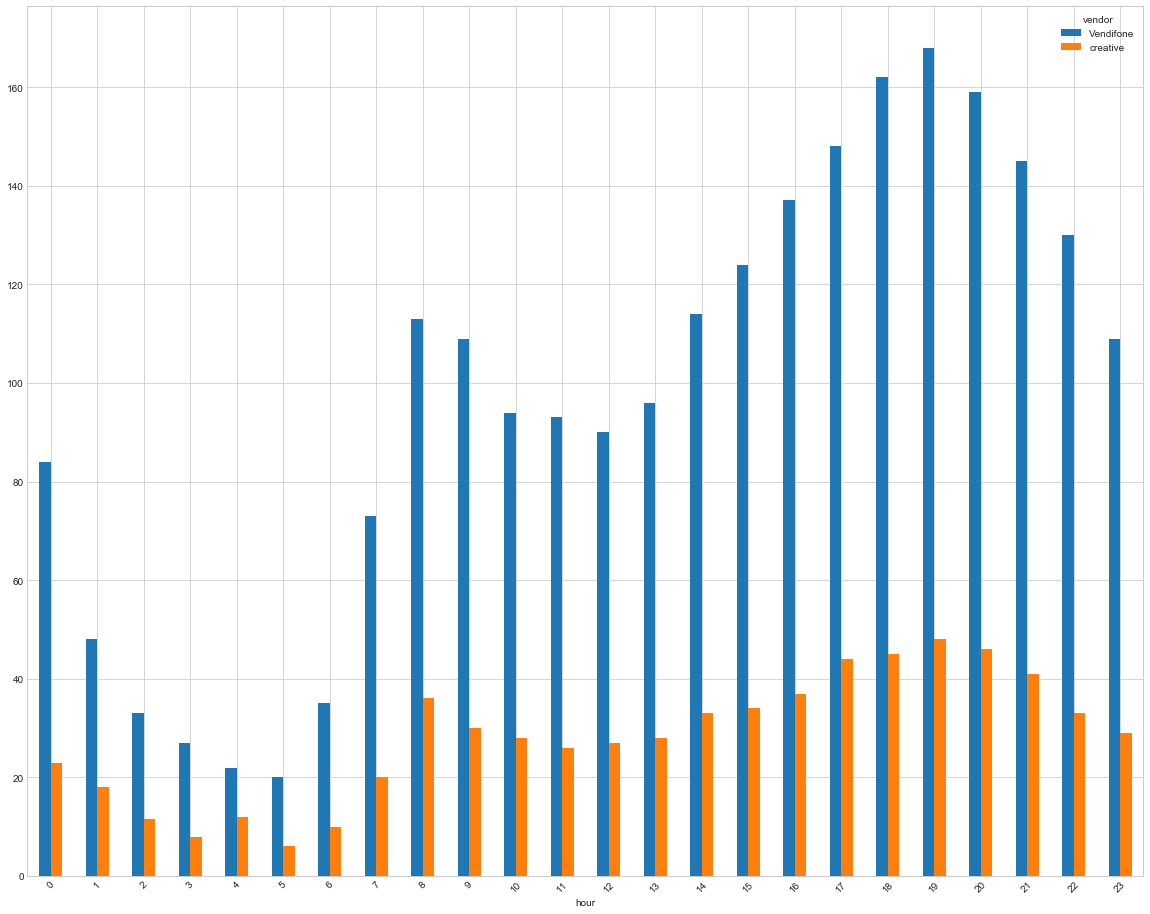

In [51]:
rdf.plot.bar(rot=45)

In [52]:
k=df[["lpep_pickup_datetime","Lpep_dropoff_datetime"]]

In [53]:
kd=k['Lpep_dropoff_datetime']-k['lpep_pickup_datetime']

In [54]:
kd.head()

0   00:03:14
1   00:08:50
2   00:44:44
3   00:06:44
4   00:05:14
dtype: timedelta64[ns]

In [55]:
df['time_travel']=kd

In [56]:
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,vendor,hour,day,time_travel
0,2,2015-03-04 15:39:16,2015-03-04 15:42:30,N,1,-73.992241,40.690121,-73.999664,40.684994,2,...,0.0,NaN,0.3,5.30,2,1,Vendifone,15,2015-03-04,00:03:14
1,2,2015-03-22 17:36:49,2015-03-22 17:45:39,N,5,-73.930038,40.819576,-73.907173,40.811306,2,...,0.0,NaN,0.0,12.00,2,2,Vendifone,17,2015-03-22,00:08:50
2,2,2015-03-25 22:08:45,2015-03-25 22:53:29,N,1,-73.961082,40.807022,-73.984642,40.663147,1,...,0.0,NaN,0.3,55.56,1,1,Vendifone,22,2015-03-25,00:44:44
3,2,2015-03-16 13:45:20,2015-03-16 13:52:04,N,1,-73.913200,40.777962,-73.926994,40.772743,2,...,0.0,NaN,0.3,7.30,2,1,Vendifone,13,2015-03-16,00:06:44
4,2,2015-03-19 18:53:50,2015-03-19 18:59:04,N,1,-73.925888,40.827602,-73.916351,40.824966,1,...,0.0,NaN,0.3,7.30,2,1,Vendifone,18,2015-03-19,00:05:14


In [ ]:
kdf=df.groupby(['vendor','time_travel','Total_amount'],as_index=False).count()